In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("SeoulBikeData.csv", encoding="cp949")

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Data Cleaning

In [12]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [13]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

#### Renaming Columns (Removing the symbols and 한글)

In [14]:
df = df.rename(columns={
    'Temperature(캜)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind Speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(캜)': 'Dew Point Temperature',
    'Solar Radiation (MJ/m2)': 'Solar Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall'
})

In [15]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Feature Engineering

In [17]:
df["Day of Week"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month
df["Is Weekend"] = df["Day of Week"].isin(["Saturday", "Sunday"]).astype(int)
df["Year"] = df["Date"].dt.year
df[["Date", "Day of Week", "Month", "Is Weekend", "Year"]].head

new_column_order = [
    'Date', 'Year', 'Month', 'Day of Week', 'Is Weekend', 'Hour',
    'Rented Bike Count',
    'Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew Point Temperature',
    'Solar Radiation', 'Rainfall', 'Snowfall',
    'Seasons', 'Holiday', 'Functioning Day'
]

In [18]:
df = df[new_column_order]

In [19]:
df.head()

,Date,Year,Month,Day of Week,Is Weekend,Hour,Rented Bike Count,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,2017,12,Friday,0,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,2017,12,Friday,0,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,2017,12,Friday,0,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,2017,12,Friday,0,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,2017,12,Friday,0,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Exploratory Data Analysis (EDA)

#### Univariate Analysis
##### Analyzing each of the features one-by-one

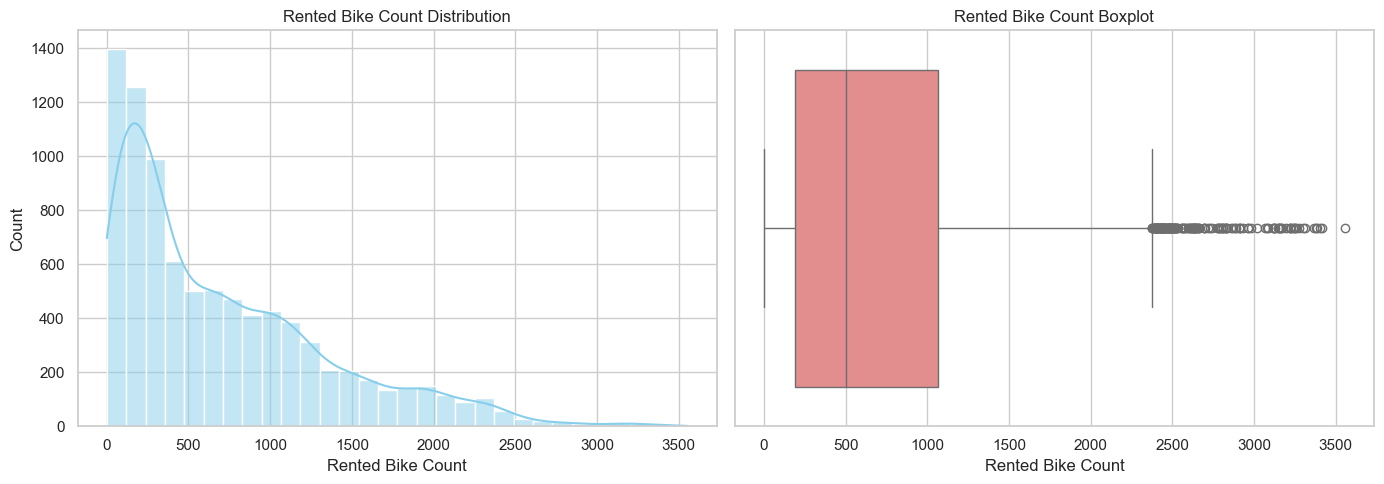

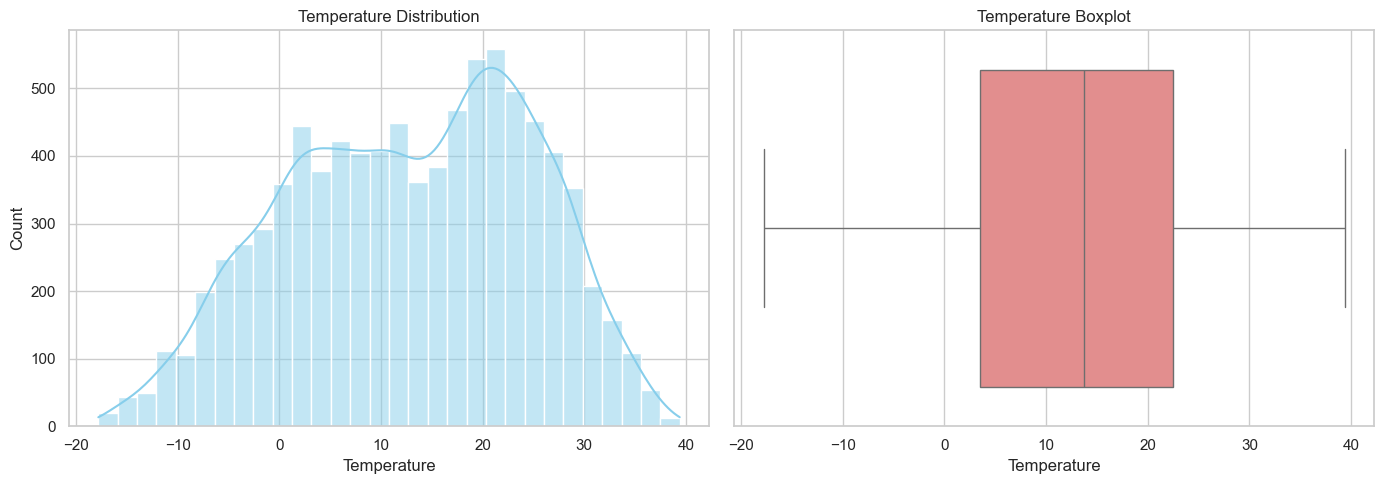

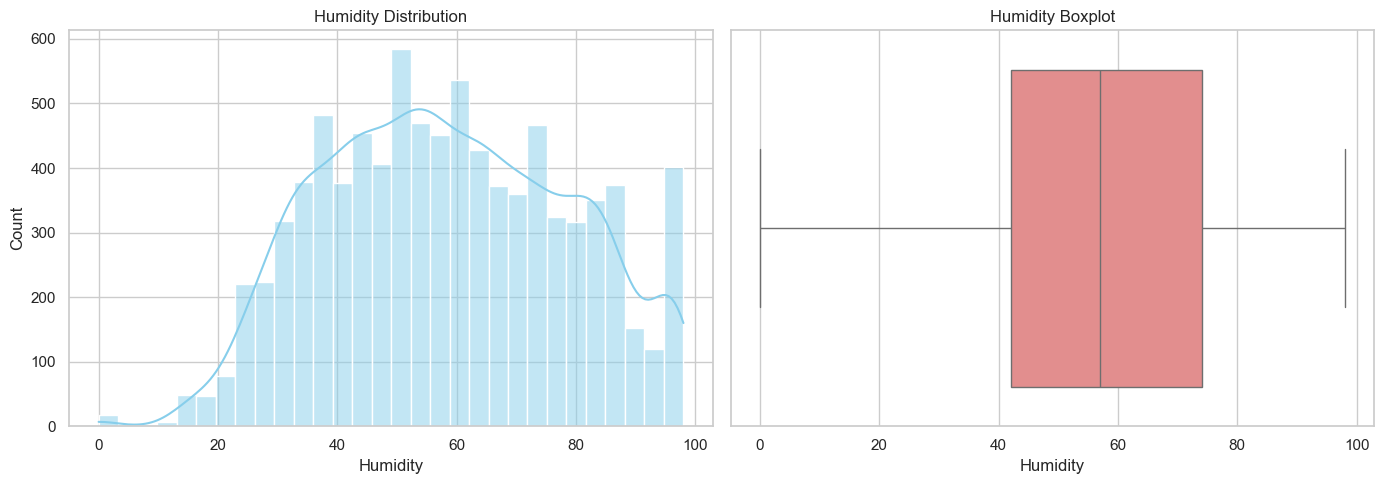

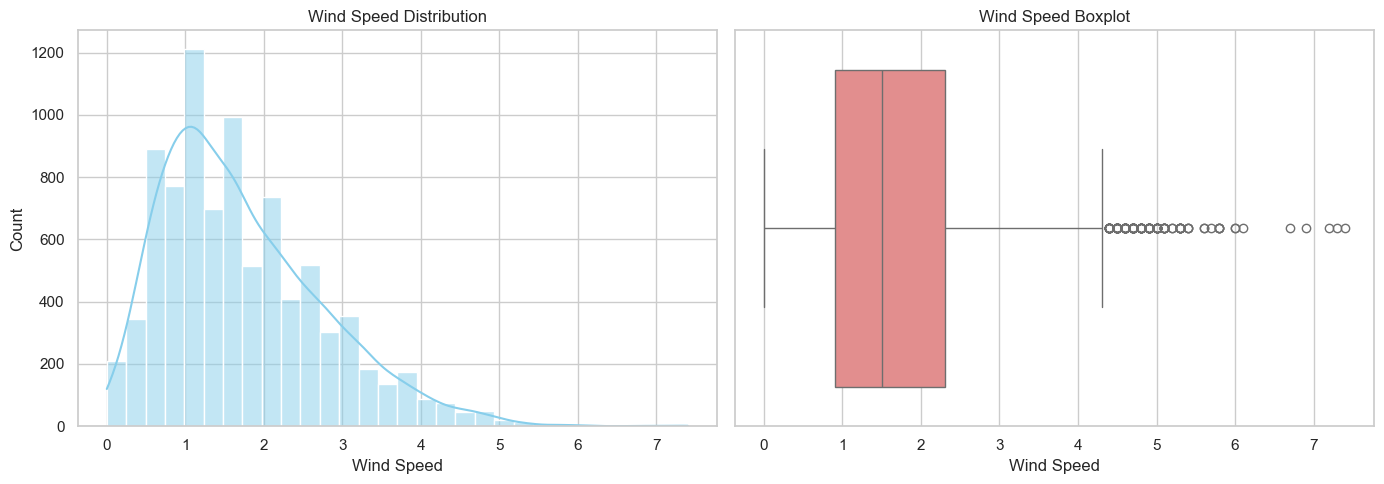

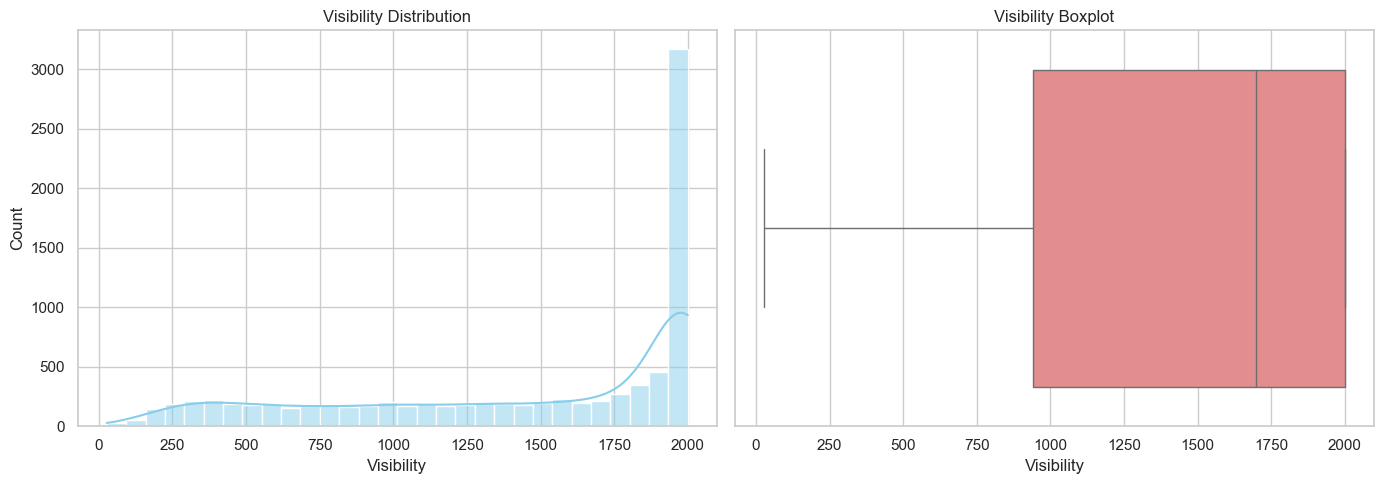

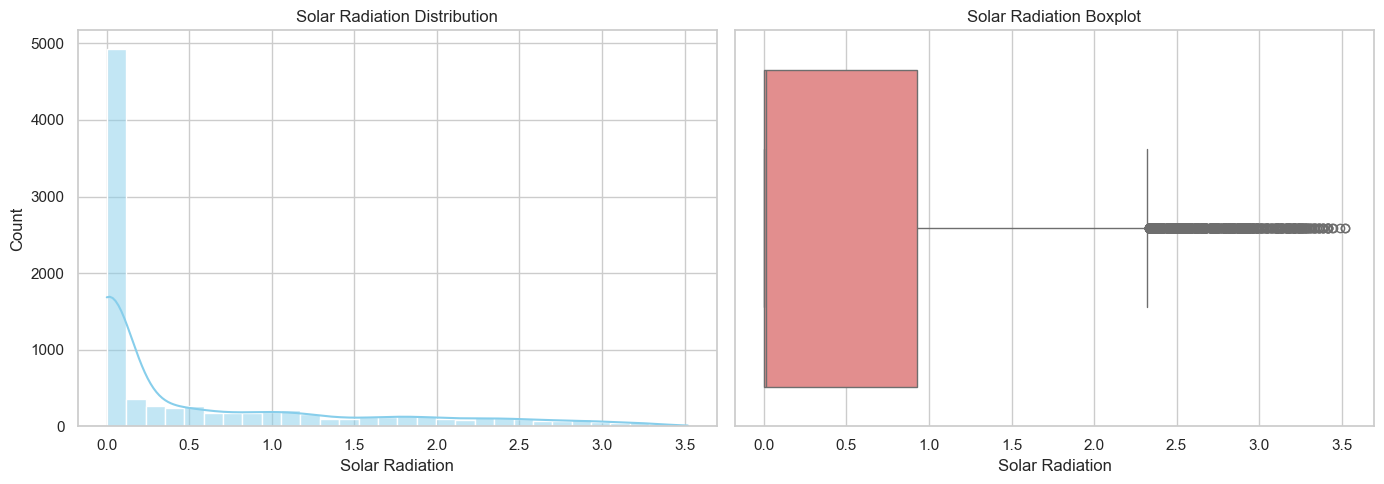

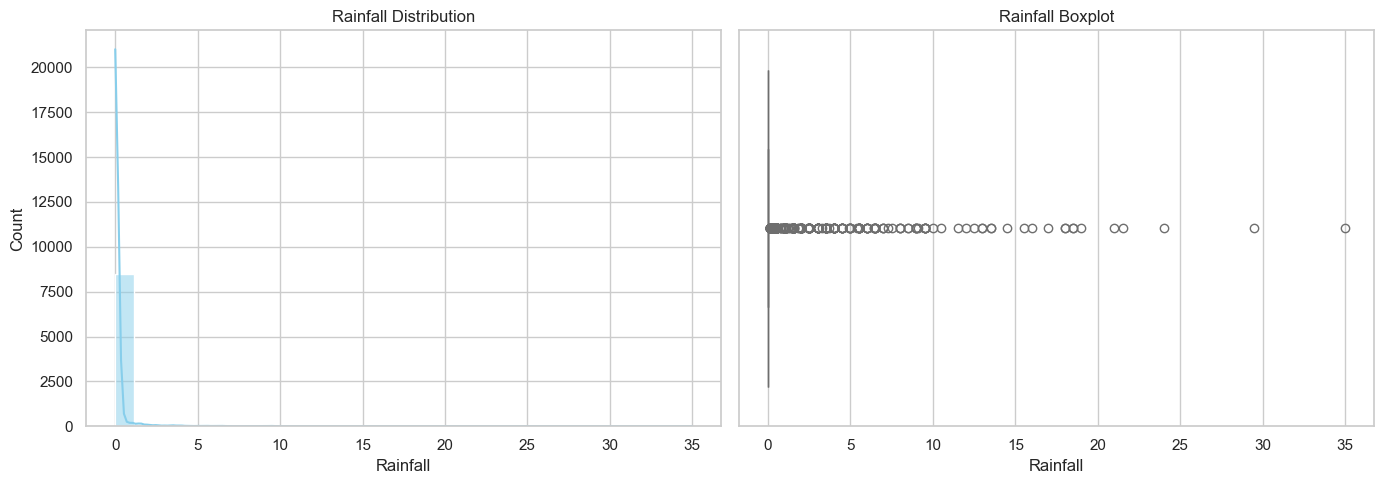

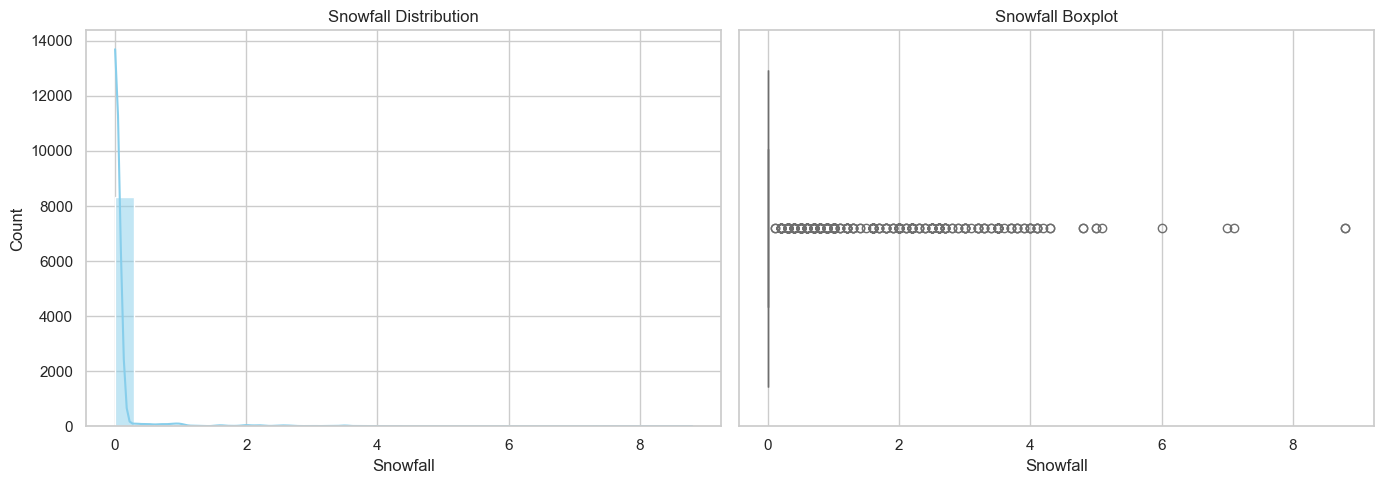

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

num_features = [
    "Rented Bike Count", "Temperature", "Humidity",
    "Wind Speed", "Visibility", "Solar Radiation",
    "Rainfall", "Snowfall"
]

for feature in num_features:
    plt.figure(figsize=(14,5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"{feature} Distribution")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color="lightcoral")
    plt.title(f"{feature} Boxplot")

    plt.tight_layout()
    plt.show()